In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [21]:
class Line(object):
    def __init__(self,start:tuple,end:tuple):
        self.startX=start[0]
        self.startY=start[1]
        
        self.endX=end[0]
        self.endY=end[1]
        
        self.slope=(self.endY-self.startY)/(self.endX-self.startX)
        #print(self.slope)
    def contains(self,sensor_loc,thresh=10):
        """
        determine whether the sensor array will "see" this array
        sensor array consists of a section of points, X and Y
        
        sensor_loc is a dict with 4 values
        x1,y1,x2,y2 which define the size and location of the sensor array
        
        if it does, it returns the location along the array,
        otherwise returns None
        """
        #sensor is a line, calculate its slope
        sensorSlope=(sensor_loc["y2"]-sensor_loc["y1"])/(sensor_loc["x2"]-sensor_loc["x1"])
                                                          
        #find the x intercept between these two lines, 
        #we have sensorSlope*(x-sensor_loc["x1"])+sensor_loc["y1"]=lineSlope(x-startX)+startY
                                                         
                                                         
        x_intercept=(self.startY-sensor_loc["y1"]-self.startX*self.slope+sensor_loc["x1"]*sensorSlope)/\
                                                       (sensorSlope-self.slope)
#         print(x_intercept)
#         print(sensorSlope*(x_intercept-sensor_loc["x1"])+sensor_loc["y1"])
#         print(self.slope*(x_intercept-self.startX)+self.startY)
        #if x_intercept is in the correct range
        #check if the x_intercept is in the range of this line
        if x_intercept<max(self.endX,self.startX) and x_intercept>min(self.endX,self.startX):
            if x_intercept<max(sensor_loc["x2"],sensor_loc["x1"]) and x_intercept>min(sensor_loc["x2"],sensor_loc["x1"]):
                return x_intercept, sensorSlope*(x_intercept-sensor_loc["x1"])+sensor_loc["y1"]
        return None
    
    def draw(self,ax):
        #print([self.startX,self.endX])
        plt.plot([self.startX,self.endX],[self.startY,self.endY],color="black")
        
        
        

In [69]:
def make_curve(degrees, r, start_point,n_lines,left=True,start_degree=0):
    """
    draws the curve as a bunch of lines
    """
    if left:
        d=np.linspace(np.radians(start_degree),np.radians(degrees+start_degree),n_lines+1)
        X=r*(np.cos(d)-np.cos(np.radians(start_degree)))
        Y=r*(np.sin(d)-np.sin(np.radians(start_degree)))
    else:
        #therefore curve right
        d=np.linspace(np.pi+np.radians(start_degree),np.radians(180-degrees+start_degree),n_lines+1)
        X=r*(np.cos(d)-np.cos(np.radians(start_degree+180)))
        Y=r*(np.sin(d)-np.sin(np.radians(start_degree+180)))
    #bias to start point
    X+=start_point[0]
    Y+=start_point[1]
    print(X)
    
    #make lines
    lines=[]
    for i in range(n_lines):
        lines.append(Line([X[i],Y[i]],
                     [X[i+1],Y[i+1]]))
    return lines
    
    

In [70]:
l=Line((0,1),(4,5))

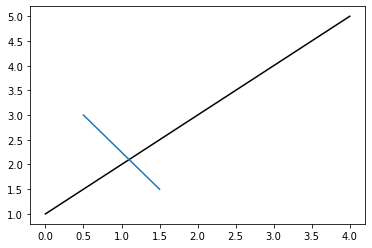

In [71]:
l.draw(plt.gca())
plt.plot([0.5,1.5],[3,1.5])

[  0.          -0.01370465  -0.05478105  -0.12311659  -0.21852399
  -0.34074174  -0.48943484  -0.66419574  -0.86454542  -1.08993476
  -1.33974596  -1.61329432  -1.90983006  -2.22854039  -2.56855175
  -2.92893219  -3.30869394  -3.70679609  -4.12214748  -4.55360965
  -5.          -5.460095    -5.93263357  -6.4163205   -6.90983006
  -7.41180955  -7.92088309  -8.43565535  -8.95471537  -9.47664044
 -10.        ]
[-10.         -11.56434465 -13.09016994 -14.539905   -15.87785252
 -17.07106781 -18.09016994 -18.91006524 -19.51056516 -19.87688341
 -20.         -19.87688341 -19.51056516 -18.91006524 -18.09016994
 -17.07106781 -15.87785252 -14.539905   -13.09016994 -11.56434465
 -10.        ]
[-1.00000000e+01 -8.43565535e+00 -6.90983006e+00 -5.46009500e+00
 -4.12214748e+00 -2.92893219e+00 -1.90983006e+00 -1.08993476e+00
 -4.89434837e-01 -1.23116594e-01  1.77635684e-15 -1.23116594e-01
 -4.89434837e-01 -1.08993476e+00 -1.90983006e+00 -2.92893219e+00
 -4.12214748e+00 -5.46009500e+00 -6.90983006e+00 -

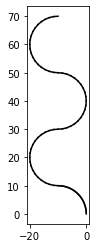

In [77]:
lines=make_curve(90, 10, start_point=[0,0],n_lines=30,left=True)
ax=plt.gca()
for l in lines:
    l.draw(ax)
    
lines=make_curve(180, 10, start_point=[-10,10],n_lines=20,left=False,start_degree=90)
for l in lines:
    l.draw(ax)
    
lines=make_curve(180, 10, start_point=[-10,30],n_lines=20,left=True,start_degree=270)
for l in lines:
    l.draw(ax)
    
lines=make_curve(180, 10, start_point=[-10,50],n_lines=20,left=False,start_degree=90)
for l in lines:
    l.draw(ax)

ax.set_aspect('equal', adjustable='box')

In [7]:
np.linspace(0,2,4)

array([0.        , 0.66666667, 1.33333333, 2.        ])

In [9]:
np.radians(0)

0.0

In [10]:
np.empty(10,dtype=Line)

array([None, None, None, None, None, None, None, None, None, None],
      dtype=object)